In [196]:
import numpy as np
import pandas as pd
import re
import os
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
import shapely.geometry as sg
import shapely.ops as so
from descartes.patch import PolygonPatch

In [197]:

meshfile = open('test5.txt','r'); #Read .txt file
trash = 30; 
read_lines = meshfile.readlines()[trash:] #Read lines function /skips first 30 lines of .txt file
matches = []
node_tags = []
el_tags = []
x_extraction = []; y_extraction = [];
node1 = []; node2 = []; node3 = []; node4 = [];


#------------------------------------------------DATA EXTRACTION----------------------------------------------------------------
for line in read_lines: #For cycle to go over all lines in .txt
    #result.append(read_lines)
    if line.__contains__('GRID'): #Condition to read lines 'GRID (nodal points and its coordinates)'
        n_data = re.match("GRID\s+(\d+)\s{8}(.{8})(.{8})", line) #Matches all nodal data in ordered columns
        node_tags.append(int(n_data.group(1))) #Saves the numbers to 'node_tags' variable to store them globally
              
        col2 = n_data.group(2)
        col3 = n_data.group(3)
        
        if col2[4].__contains__('-'):
            col2 = col2[:4] + 'e-' + col2[5:]
            
        elif col2[5].__contains__('-'):
            col2 = col2[:5] + 'e-' + col2[6:]
        
        if col3[4].__contains__('-'):
            col3 = col3[:4] + 'e-' + col3[5:]
            
        elif col3[5].__contains__('-'):
            col3 = col3[:5] + 'e-' + col3[6:] 
            
        x_extraction.append(float(col2))      
        y_extraction.append(float(col3)) 

    try:
            el_data = re.match('CQUAD4\s+(\d+)\s+\d\s+(\d+)\s+(\d+)\s+(\d+)\s+(\d+)', line) 
            el_tags.append(int(el_data.group(1)))
            node1.append(int(el_data.group(2)))
            node2.append(int(el_data.group(3)))
            node3.append(int(el_data.group(4)))
            node4.append(int(el_data.group(5)))
            
    except AttributeError:
        pass;
 
 #----------------------------------------------DATA CONVERSION-----------------------------------------------------------------        


node_tags = np.array(node_tags) 


x_extraction = np.array(x_extraction) 
y_extraction = np.array(y_extraction) 

el_tags = np.array(el_tags)
node1 = np.array(node1); node2 = np.array(node2); node3 = np.array(node3); node4 = np.array(node4); 
#connectivity = np.column_stack((node1,node2,node3,node4))

nnodes = len(node_tags)
print(nnodes)
nelements = len(el_tags) 

temp1 = np.array([],dtype=np.int32)
temp2 = np.array([],dtype=np.int32)
temp3 = np.array([],dtype=np.int32)
temp4 = np.array([],dtype=np.int32)

for i in range(nelements):
  temp1=np.append(temp1,np.argwhere(node1[i] == node_tags)[0])
  temp2=np.append(temp2,np.argwhere(node2[i] == node_tags)[0])
  temp3=np.append(temp3,np.argwhere(node3[i] == node_tags)[0])
  temp4=np.append(temp4,np.argwhere(node4[i] == node_tags)[0])

connectivity = np.column_stack((temp1,temp2,temp3,temp4))
nperelement = (np.shape(connectivity)[1])
node_tags = np.array(list(range(0, nnodes)))
nodal_points = np.column_stack((node_tags,x_extraction,y_extraction))



2224


KeyboardInterrupt: 

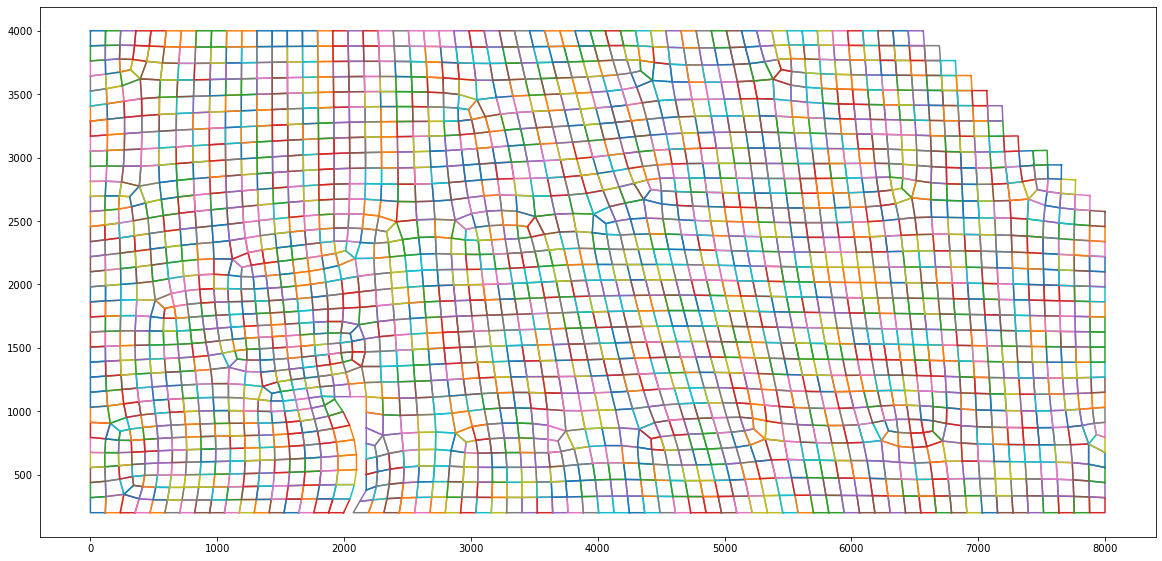

In [198]:
#nodal_points = nodal_points.tolist()
for i in range(nelements):
     #print([connectivity[i,0]-1,1])
    


     x1 = nodal_points[connectivity[i,0],1]
     x2 = nodal_points[connectivity[i,1],1]

     #if connectivity[i,1] != 0:
      #    x2 = nodal_points[connectivity[i,1]-1,1]
       
     #else:
      #    x2 = nodal_points[0,1] 
       

     x3 = nodal_points[connectivity[i,2],1]
     x4 = nodal_points[connectivity[i,3],1]


     y1 = nodal_points[connectivity[i,0],2]
     y2 = nodal_points[connectivity[i,1],2]
     y3 = nodal_points[connectivity[i,2],2]
     y4 = nodal_points[connectivity[i,3],2]
     


     #print(nodal_points[connectivity[319,0],1])
     #print(nodal_points[connectivity[319,0],2])
     #print(nodal_points[connectivity[319,1],1])
     #print(nodal_points[connectivity[319,1],2])
     #print(nodal_points[connectivity[319,2],1])
     #print(nodal_points[connectivity[319,2],2])
     #print(nodal_points[connectivity[319,3],1])
     #print(nodal_points[connectivity[319,3],2])


  
#x = [nodal_points[connectivity[319,0],1],nodal_points[connectivity[319,1],1],nodal_points[connectivity[319,2],1],nodal_points[connectivity[319,3],1],nodal_points[connectivity[319,0],1]]
#y = [nodal_points[connectivity[319,0],2],nodal_points[connectivity[319,1],2],nodal_points[connectivity[319,2],2],nodal_points[connectivity[319,3],2],nodal_points[connectivity[319,0],2]]

     x = [x1,x2,x3,x4,x1]
     y = [y1,y2,y3,y4,y1]

     #plt.rcParams["figure.figsize"] = (20,20)
     plt.plot(x,y)
     
     plt.axis('scaled')
     #ax.add_patch(plt.Polygon(square1))
     plt.draw()
#print(nodal_points[connectivity[290,0],1])
#print(nodal_points[connectivity[290,0],2])
#print(nodal_points[connectivity[290,1],1])
#print(nodal_points[connectivity[290,1],2])
#print(nodal_points[connectivity[290,2],1])
#print(nodal_points[connectivity[290,2],2])
#print(nodal_points[connectivity[290,3],1])
#print(nodal_points[connectivity[290,3],2])
'''
print(nodal_points[connectivity[319,0],1])
print(nodal_points[connectivity[319,0],2])
print(nodal_points[connectivity[319,1],1])
print(nodal_points[connectivity[319,1],2])
print(nodal_points[connectivity[319,2],1])
print(nodal_points[connectivity[319,2],2])
print(nodal_points[connectivity[319,3],1])
print(nodal_points[connectivity[319,3],2])

'''
     


In [ ]:
#nodal_points = nodal_points.tolist()
#print(nodal_points)

#print(nodal_points.index(connectivity[0,0]-1))
for i in range(nelements):
     

     x1 = nodal_points[nodal_points.index(connectivity[i,0]-1),1]
     x2 = nodal_points[nodal_points.index(connectivity[i,1]-1),1]
     x3 = nodal_points[nodal_points.index(connectivity[i,2]-1),1]
     x4 = nodal_points[nodal_points.index(connectivity[i,3]-1),1]
     
     y1 = nodal_points[nodal_points.index(connectivity[i,0]-1),2]
     y2 = nodal_points[nodal_points.index(connectivity[i,1]-1),2]
     y3 = nodal_points[nodal_points.index(connectivity[i,2]-1),2]
     y4 = nodal_points[nodal_points.index(connectivity[i,3]-1),2] 

     

     x = [x1,x2,x3,x4]
     y = [y1,y2,y3,y4]

     

AttributeError: 'numpy.ndarray' object has no attribute 'index'

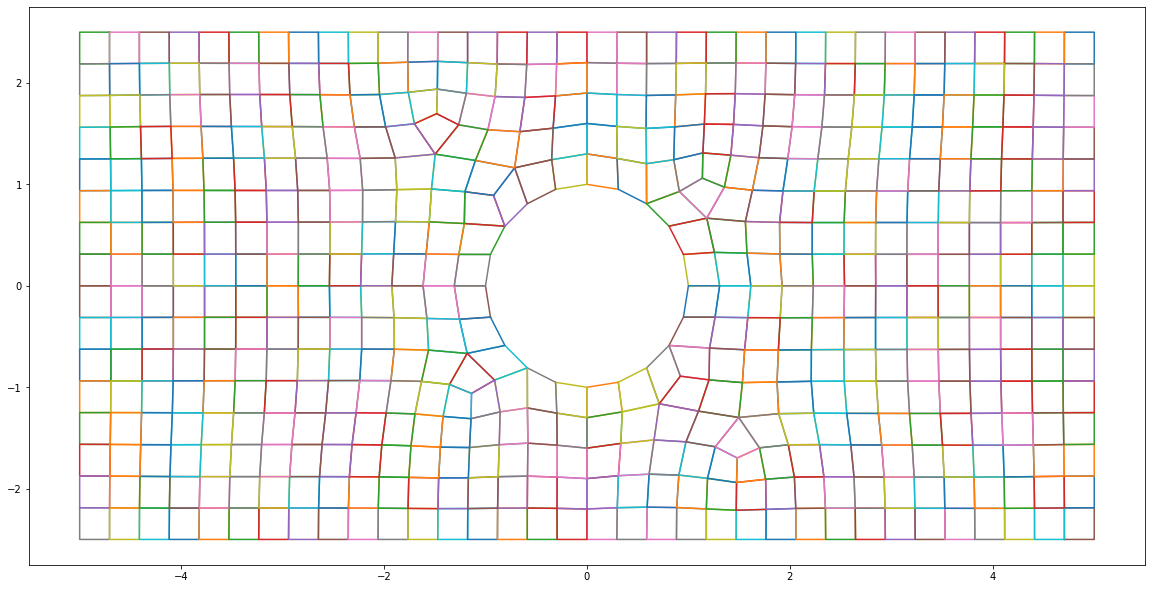

In [ ]:
#--------------------------------------------------------CONNECTION-------------------------------------------------------------

for i in range(nelements):
    
     x1 = nodal_points[(np.where(nodal_points == connectivity[i][0]))[0][0]][1]
     x2 = nodal_points[(np.where(nodal_points == connectivity[i][1]))[0][0]][1] 
     x3 = nodal_points[(np.where(nodal_points == connectivity[i][2]))[0][0]][1] 
     x4 = nodal_points[(np.where(nodal_points == connectivity[i][3]))[0][0]][1] 
     
     y1 = nodal_points[(np.where(nodal_points == connectivity[i][0]))[0][0]][2] 
     y2 = nodal_points[(np.where(nodal_points == connectivity[i][1]))[0][0]][2] 
     y3 = nodal_points[(np.where(nodal_points == connectivity[i][2]))[0][0]][2]    
     y4 = nodal_points[(np.where(nodal_points == connectivity[i][3]))[0][0]][2] 

     square1 = Polygon([(x1,y1), (x2,y2), (x3,y3), (x4,y4)])
     
     #fig, ax = plt.subplots()
     x,y = square1.exterior.xy
     plt.plot(x,y)
     plt.axis('scaled')
     #ax.add_patch(plt.Polygon(square1))
     plt.draw()
